In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati
from math import pi
from wordcloud import WordCloud

sns.set()

In [46]:
dataset = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Entrenamieto_ECI_2020.csv', parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                                                           'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                                                           'Quote_Expiry_Date', 'Actual_Delivery_Date' ])
dataset.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Submitted_for_Approval                         int64
Bureaucratic_Code                             object
Account_Created_Date                  datetime64[ns]
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  

In [47]:
dataset.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [48]:
dataset[dataset['Stage']== 'Closed Won']['ASP_Currency'].value_counts()

USD    3592
JPY    3112
EUR    2422
AUD     407
Name: ASP_Currency, dtype: int64

In [49]:
dataset['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

<span style="font-size:larger;">Para convertir monedas</span>

In [50]:
dataset['conversion'] = dataset['ASP_(converted)']/dataset['ASP']

cotizacion = dataset.groupby(['ASP_Currency', 'Opportunity_Created_Date']).agg({'conversion': 'mean'}).reset_index()
#print(dataset[dataset['Stage']== 'Closed Won']['conversion'].value_counts())
cotizacion = cotizacion.rename(columns = {'conversion': 'conversion_diaria'})
cotizacion

dataset= dataset.merge(cotizacion, on = ['ASP_Currency', 'Opportunity_Created_Date'], how = 'left')

dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1.131096,1.131095
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,1.131094,1.131095
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,1.000000,1.000000
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,1.131096,1.131093
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None,1.131096,1.131093
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,...,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,1.131096,1.131093
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,2015-10-20,...,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None,1.000000,1.000000


In [51]:
dataset['conversion_diaria'].isna().value_counts()

False    16876
True        71
Name: conversion_diaria, dtype: int64

In [52]:
#dataset[dataset['conversion_diaria'].isna()].head()
dataset['conversion'] = dataset.loc[:,'conversion'].fillna(dataset['conversion_diaria'])

In [53]:
#dropeo un registro que genera ruido
dataset = dataset.drop(dataset[dataset['conversion'] == np.inf].index)

In [54]:
(dataset['conversion']== np.inf).value_counts()

False    16946
Name: conversion, dtype: int64

In [55]:
#elimino el valor infinito


In [56]:
#a los pocos registros que quedan, los llenamos con el promedio
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].std())

0.008988898978753627
1.1151393614133822e-05


In [57]:
print(dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
print(dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].std())

1.131064624673212
0.001954246969859013


In [58]:
dataset['Prod_Category_A'].value_counts()

Prod_Category_A_None    16946
Name: Prod_Category_A, dtype: int64

In [59]:
dataset.loc[dataset['ASP_Currency'] == 'USD', 'conversion'] = 1


In [60]:
print(dataset['conversion'].isna().sum())

64


In [61]:
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].notna().sum())
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].isna().sum())

4460
61


In [62]:
dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
dataset['conversion'].value_counts()

1.000000    7362
0.008990     323
0.008990     299
1.131091     273
1.131083     235
            ... 
1.131107       1
0.008990       1
1.131103       1
0.008902       1
0.008956       1
Name: conversion, Length: 375, dtype: int64

In [63]:
dataset['Total_Amount_USD'] = dataset['Total_Amount'] * dataset['conversion']
dataset['Total_Taxable_Amount_USD'] = dataset['Total_Taxable_Amount'] * dataset['conversion']

In [64]:
dataset.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria,Total_Amount_USD,Total_Taxable_Amount_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1.131096,1.131095,5964043.80,5964043.80
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,1.131094,1.131095,54552.68,54552.68
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,1.000000,1.000000,83865.60,83865.60
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,7421881.50,7421881.50
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,13357192.50,13357192.50


In [65]:
#Wins con total de dinero 
wins = dataset.loc[dataset['Stage'] == 'Closed Won']
wins = wins.groupby(['Region']).agg({'Total_Amount_USD':['sum']}).reset_index()

# level0 = wins.columns.get_level_values(0)
# level1 = wins.columns.get_level_values(1)
# wins.columns = level0 + ' ' + level1
wins.columns = ['Region','TotalGananciasEnUSD']
wins

,Region,TotalGananciasEnUSD
0,APAC,2.014008e+08
1,Americas,7.580518e+08
2,EMEA,5.799539e+08
3,Japan,1.177900e+08
4,Middle East,4.750702e+06


In [66]:
lost = dataset.loc[dataset['Stage'] == 'Closed Lost']
lost = lost.groupby(['Region']).agg({'Total_Amount_USD':['sum']}).reset_index()

# level0 = wins.columns.get_level_values(0)
# level1 = wins.columns.get_level_values(1)
# wins.columns = level0 + ' ' + level1
lost.columns = ['Region','TotalPerdidasEnUSD']
lost

,Region,TotalPerdidasEnUSD
0,APAC,3.754151e+09
1,Americas,6.697853e+09
2,EMEA,4.168169e+09
3,Japan,2.416296e+08
4,Middle East,2.899886e+08


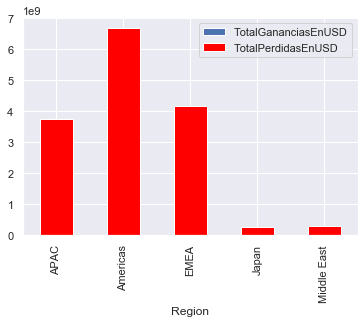

In [67]:
#Closed won
ax = mplt.gca()
wins.plot(kind='bar',x='Region',y='TotalGananciasEnUSD',ax=ax)
lost.plot(kind='bar',x='Region',y='TotalPerdidasEnUSD', color='red', ax=ax)

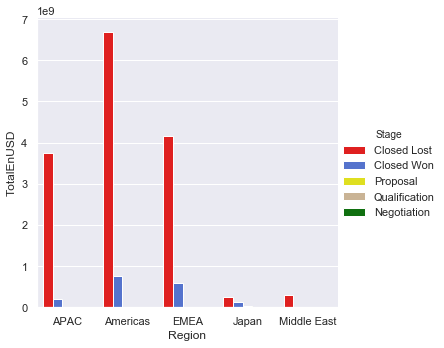

In [68]:
df = dataset.groupby(['Region','Stage']).agg({'Total_Amount_USD':['sum']}).reset_index()
df.columns = ['Region','Stage','TotalEnUSD']

stage_palette ={"Closed Won": "royalblue", "Closed Lost": "red", "Negotiation":"green", "Qualification" :"tan", "Proposal": "Yellow"}

sns.catplot(x="Region", y="TotalEnUSD", hue="Stage", kind="bar", data=df,palette = stage_palette)

In [69]:
pd.set_option('max_columns', None)
dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria,Total_Amount_USD,Total_Taxable_Amount_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1.131096,1.131095,5.964044e+06,5.964044e+06
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,1.131094,1.131095,5.455268e+04,5.455268e+04
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,1.000000,1.000000,8.386560e+04,8.386560e+04
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,7.421882e+06,7.421882e+06
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,1.335719e+07,1.335719e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,None,

In [70]:
df = dataset.loc[dataset['Stage'] == 'Closed Won'].groupby(['Billing_Country','Stage']).agg({'Stage': 'count'})
df.columns= ['Closed won count']
df = df.reset_index()

dfLost = dataset.loc[dataset['Stage'] == 'Closed Lost'].groupby(['Billing_Country','Stage']).agg({'Stage': 'count'})
dfLost.columns= ['Closed lost count']
dfLost = dfLost.reset_index()

df

,Billing_Country,Stage,Closed won count
0,Australia,Closed Won,695
1,Austria,Closed Won,122
2,Bahrain,Closed Won,1
3,Belgium,Closed Won,119
4,Bulgaria,Closed Won,1
5,Cambodia,Closed Won,3
6,Canada,Closed Won,32
7,China,Closed Won,203
8,Cyprus,Closed Won,34
9,Czech Republic,Closed Won,3


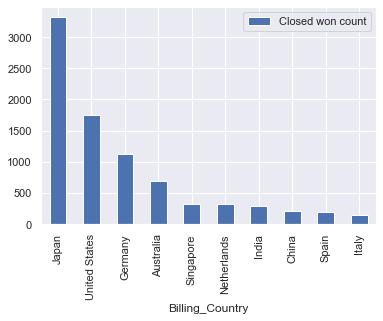

In [71]:
ax = mplt.gca()
df.nlargest(10,'Closed won count').plot(kind='bar',x='Billing_Country',y='Closed won count',ax=ax)
#dfLost.nlargest(10,'Closed lost count').plot(kind='bar',x='Billing_Country',y='Closed lost count', color='red', ax=ax)

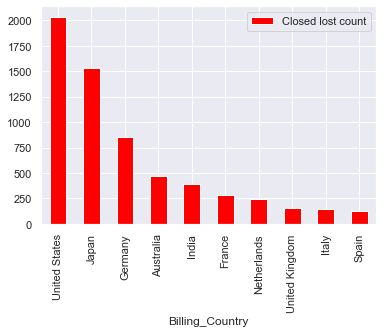

In [72]:
ax = mplt.gca()
dfLost.nlargest(10,'Closed lost count').plot(kind='bar',x='Billing_Country',y='Closed lost count', color='red', ax=ax)

In [73]:
dataset.groupby(['Billing_Country']).agg({'Stage': 'count'}).nlargest(10,'Stage')

,Stage
Billing_Country,
Japan,4878
United States,3802
Germany,1979
Australia,1169
India,672
Netherlands,563
Singapore,432
France,396
Spain,317


In [74]:
lista_top_paises = dataset['Billing_Country'].value_counts().head(20).index.tolist()
countDataset = dataset.loc[dataset['Billing_Country'].isin(lista_top_paises)].groupby(['Billing_Country','Stage']).agg({'Stage': 'count'})
countDataset= countDataset.unstack().reset_index()
countDataset.columns=['Billing_Country','Closed Lost', 'Closed Won','Negociation','Proposal','Qualification']
countDataset = countDataset.fillna(0)
countDataset['Total_Operations'] = countDataset['Closed Lost']+ countDataset['Closed Won']+countDataset['Negociation']+countDataset['Proposal']+countDataset['Qualification']
countDataset


,Billing_Country,Closed Lost,Closed Won,Negociation,Proposal,Qualification,Total_Operations
0,Australia,470.0,695.0,0.0,4.0,0.0,1169.0
1,Austria,23.0,122.0,0.0,0.0,0.0,145.0
2,Belgium,107.0,119.0,0.0,0.0,0.0,226.0
3,Canada,88.0,32.0,0.0,0.0,0.0,120.0
4,China,19.0,203.0,0.0,0.0,0.0,222.0
5,France,285.0,111.0,0.0,0.0,0.0,396.0
6,Germany,855.0,1122.0,1.0,1.0,0.0,1979.0
7,India,387.0,284.0,0.0,0.0,1.0,672.0
8,Indonesia,86.0,53.0,0.0,3.0,0.0,142.0
9,Italy,143.0,152.0,0.0,0.0,0.0,295.0


In [75]:
paisesConMasOperaciones = countDataset.nlargest(10,'Total_Operations')
paisesConMasOperaciones = paisesConMasOperaciones.set_index('Billing_Country')

Text(0.5, 1.1, 'Cantidad de operaciones de los top paises ')

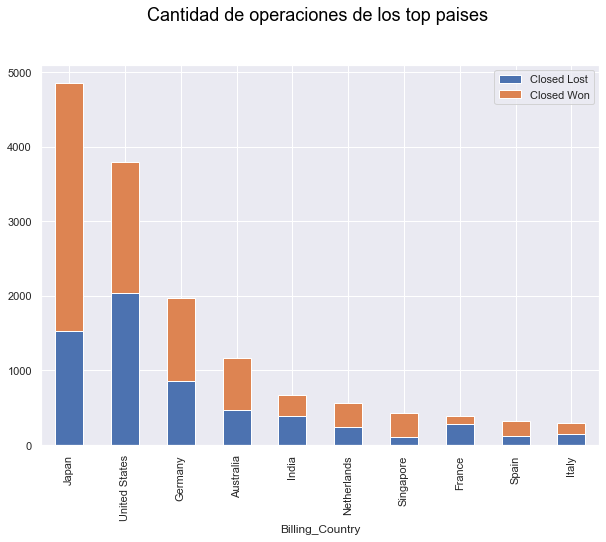

In [76]:
paisesConMasOperaciones.drop(['Qualification',"Total_Operations","Proposal","Negociation"],axis = 1).plot.bar(stacked=True, figsize=(10,7))
mplt.title("Cantidad de operaciones de los top paises ", size=18, color = 'black', y=1.1)

In [77]:
taxableDataset =  dataset.loc[dataset['Billing_Country'].isin(lista_top_paises)].groupby(['Billing_Country']).agg({'Total_Taxable_Amount_USD': 'sum'})
taxableDataset = taxableDataset.reset_index()
taxableDataset['Total_Ammount_USD'] = dataset.loc[dataset['Billing_Country'].isin(lista_top_paises)].groupby(['Billing_Country']).agg({'Total_Amount_USD': 'sum'}).reset_index()['Total_Amount_USD']
taxableDataset['Taxable_Difference'] = taxableDataset['Total_Taxable_Amount_USD'] - taxableDataset['Total_Ammount_USD']
taxableDataset

,Billing_Country,Total_Taxable_Amount_USD,Total_Ammount_USD,Taxable_Difference
0,Australia,4.527611e+09,1.971366e+09,2.556245e+09
1,Austria,5.937795e+07,2.815869e+07,3.121926e+07
2,Belgium,4.500144e+08,4.241429e+08,2.587147e+07
3,Canada,7.571284e+08,1.807793e+08,5.763491e+08
4,China,4.080310e+07,3.516451e+07,5.638590e+06
5,France,5.110609e+08,4.549467e+08,5.611421e+07
6,Germany,4.034896e+09,2.077067e+09,1.957829e+09
7,India,1.104003e+09,6.575188e+08,4.464840e+08
8,Indonesia,3.054278e+07,1.263209e+08,-9.577808e+07
9,Italy,3.149945e+08,1.758005e+08,1.391940e+08


In [78]:
trf = dataset.loc[dataset['Billing_Country'].isin(lista_top_paises)].groupby(['Billing_Country','Stage',]).agg({'TRF': ['mean','count']}).reset_index()
trf

Billing_Country          Stage        TRF      
                                        mean count
0        Australia    Closed Lost  11.795745   470
1        Australia     Closed Won   0.041727   695
2        Australia       Proposal   1.000000     4
3          Austria    Closed Lost   1.782609    23
4          Austria     Closed Won   0.016393   122
5          Belgium    Closed Lost   3.560748   107
6          Belgium     Closed Won   0.109244   119
7           Canada    Closed Lost   3.840909    88
8           Canada     Closed Won   0.281250    32
9            China    Closed Lost   4.368421    19
10           China     Closed Won   0.014778   203
11          France    Closed Lost   3.308772   285
12          France     Closed Won   0.279279   111
13         Germany    Closed Lost   5.254971   855
14         Germany     Closed Won   0.647059  1122
15         Germany    Negotiation   9.000000     1
16         Germany       Proposal  20.000000     1
17           India    Closed Lost   3.984496   387
18           India     Closed Won   0.644366   284
19           India  Qualification   1.000000     1
20       Indonesia    Closed Lost   2.709302    86
21       Indonesia     Closed Won   0.113208    53
22       Indonesia       Proposal   0.666667     3
23           Italy    Closed Lost   2.783217   143
24           Italy     Closed Won   0.032895   152
25           Japan    Closed Lost   0.449086  1532
26           Japan     Closed Won   0.050858  3323
27           Japan    Negotiation   0.000000     1
28           Japan       Proposal   5.714286    14
29           Japan  Qualification   2.625000     8
30          Jordan    Closed Lost   1.046154    65
31          Jordan     Closed Won   0.102564    39
32          Jordan    Negotiation   0.500000     2
33      Luxembourg    Closed Lost   0.787234    47
34      Luxembourg     Closed Won   0.011236    89
35     Netherlands    Closed Lost   1.995968   248
36     Netherlands     Closed Won   0.266667   315
37     Philippines    Closed Lost   4.036364    55
38     Philippines     Closed Won   0.012048    83
39       Singapore    Closed Lost   5.447368   114
40       Singapore     Closed Won   0.103774   318
41           Spain    Closed Lost   9.528000   125
42           Spain     Closed Won   0.031250   192
43        Thailand    Closed Lost   7.543689   103
44        Thailand     Closed Won   0.422222    90
45        Thailand  Qualification   5.000000     2
46  United Kingdom    Closed Lost   2.929936   157
47  United Kingdom     Closed Won   0.779528   127
48   United States    Closed Lost   7.077641  2035
49   United States     Closed Won   0.822792  1755
50   United States    Negotiation   0.000000     8
51   United States       Proposal   1.500000     4

In [79]:
radartrf = dataset.groupby(['Stage']).agg({'TRF': ['mean','max','std','min']}).reset_index()
radartrf

Stage       TRF                    
                      mean  max        std min
0    Closed Lost  4.954552  500  18.054938   0
1     Closed Won  0.317109   42   1.540895   0
2    Negotiation  0.722222    9   2.136670   0
3       Proposal  4.114286   33   7.271101   0
4  Qualification  2.909091   20   5.990902   0

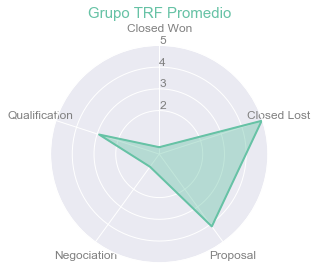

<Figure size 1000x1000 with 0 Axes>

In [80]:
df = pd.DataFrame({
'group': ['TRF Promedio'],
'Closed Won': [0.317109],
'Closed Lost': [4.954552],
'Proposal':[4.114286],
'Negociation':[0.722222],
'Qualification':[2.909091]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = mplt.subplot(1,1,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles[:-1], categories, color='grey', size=12)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([2,3,4,5], ["2","3","4","5"], color="grey", size=12)
    mplt.ylim(0,5)
 
    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    mplt.title(title, size=15, color=color, y=1.1)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    mplt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
my_palette = mplt.cm.get_cmap("Set2", len(df.index))
 
    # Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Grupo '+df['group'][row], color=my_palette(row))


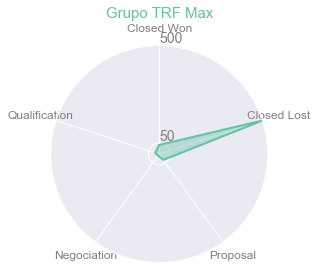

<Figure size 1000x1000 with 0 Axes>

In [81]:
df = pd.DataFrame({
'group': ['TRF Max'],
'Closed Won': [42],
'Closed Lost': [500],
'Proposal':[33],
'Negociation':[9],
'Qualification':[20]
})


def make_spider( row, title, color):
 
    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = mplt.subplot(1,1,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles[:-1], categories, color='grey', size=12)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([50,500], ["50","500"], color="grey", size=14)
    mplt.ylim(0,500)
 
    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    mplt.title(title, size=15, color=color, y=1.1)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    mplt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
my_palette = mplt.cm.get_cmap("Set2", len(df.index))
 
    # Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Grupo '+df['group'][row], color=my_palette(row))


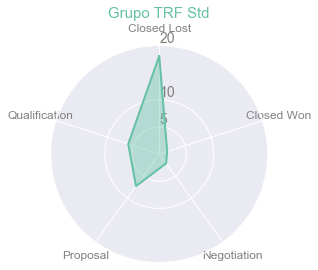

<Figure size 1000x1000 with 0 Axes>

In [82]:
df = pd.DataFrame({
'group': ['TRF Std'],
"Closed Lost"	:[18.054938],
"Closed Won"	:[1.540895],
"Negotiation"	:[2.136670],
"Proposal"	:[7.271101],
"Qualification"	:[5.990902],
})


def make_spider( row, title, color):
 
    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = mplt.subplot(1,1,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles[:-1], categories, color='grey', size=12)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([5,10,20], ["5","10","20"], color="grey", size=14)
    mplt.ylim(0,20)
 
    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    mplt.title(title, size=15, color=color, y=1.1)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    mplt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
my_palette = mplt.cm.get_cmap("Set2", len(df.index))
 
    # Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Grupo '+df['group'][row], color=my_palette(row))


In [83]:
trfProds = dataset.groupby(['Bureaucratic_Code','Stage']).agg({'TRF': ['mean','count']}).reset_index()
trfProds

Bureaucratic_Code          Stage        TRF      
                                             mean count
0   Bureaucratic_Code_0     Closed Won   4.725490    51
1   Bureaucratic_Code_1    Closed Lost   2.861635   159
2   Bureaucratic_Code_1     Closed Won   0.205882   102
3   Bureaucratic_Code_2    Closed Lost  11.500000   128
4   Bureaucratic_Code_2     Closed Won   0.859649   114
5   Bureaucratic_Code_3    Closed Lost  20.000000     1
6   Bureaucratic_Code_3     Closed Won   1.000000     1
7   Bureaucratic_Code_4    Closed Lost   3.742251  4291
8   Bureaucratic_Code_4     Closed Won   0.210590  8253
9   Bureaucratic_Code_4    Negotiation   0.764706    17
10  Bureaucratic_Code_4       Proposal   4.615385    26
11  Bureaucratic_Code_5    Closed Lost   6.644765  2770
12  Bureaucratic_Code_5     Closed Won   0.874382  1011
13  Bureaucratic_Code_5    Negotiation   0.000000     1
14  Bureaucratic_Code_5       Proposal   2.666667     9
15  Bureaucratic_Code_5  Qualification   2.909091    11
16  Bureaucratic_Code_6     Closed Won  40.000000     1

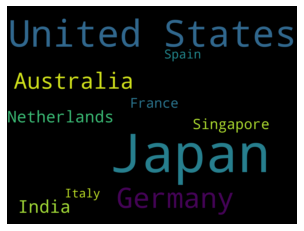

In [84]:
freqPaises = dataset['Billing_Country'].value_counts()

wordcloud = WordCloud(width=2000,height=1500, max_words= 10 ,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freqPaises)
mplt.imshow(wordcloud, interpolation='bilinear')
mplt.axis("off")
mplt.show()

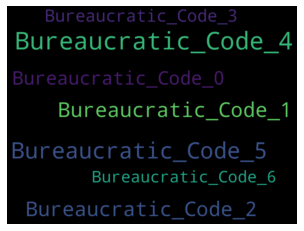

In [85]:
freqCode = dataset['Bureaucratic_Code'].value_counts()

wordcloud = WordCloud(width=2000,height=1500, max_words= 10 ,relative_scaling=0.1,normalize_plurals=False).generate_from_frequencies(freqCode)
mplt.imshow(wordcloud, interpolation='bilinear')
mplt.axis("off")
mplt.show()

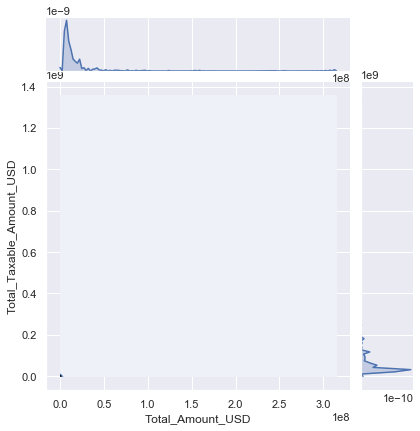

In [86]:
sns.jointplot(x=dataset["Total_Amount_USD"], y=dataset["Total_Taxable_Amount_USD"], kind='kde')

In [87]:
dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria,Total_Amount_USD,Total_Taxable_Amount_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1.131096,1.131095,5.964044e+06,5.964044e+06
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,1.131094,1.131095,5.455268e+04,5.455268e+04
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,1.000000,1.000000,8.386560e+04,8.386560e+04
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,7.421882e+06,7.421882e+06
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,1.335719e+07,1.335719e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,None,

In [88]:
asd = dataset.groupby(['Account_Name','Stage']).agg({'TRF': ['mean','count']}).reset_index()
asd.columns = ['Account_Name','Stage','TRF mean','TRF count']
asd

# sns.jointplot(x=asd["Account_Name"], y=asd["TRF mean"], kind='kde')

,Account_Name,Stage,TRF mean,TRF count
0,Account_Name_0,Closed Won,0.0,1
1,Account_Name_1,Closed Lost,50.0,1
2,Account_Name_10,Closed Lost,0.0,1
3,Account_Name_100,Closed Won,0.0,1
4,Account_Name_100,Proposal,0.0,1
...,...,...,...,...
2100,Account_Name_994,Closed Won,0.0,4
2101,Account_Name_996,Closed Lost,12.0,1
2102,Account_Name_997,Closed Lost,0.0,1
2103,Account_Name_998,Closed Won,0.0,1


In [89]:
sns.histplot(asd, x="TRF mean", y="Account_Name", hue="Account_Name", legend=False)

AttributeError: module 'seaborn' has no attribute 'histplot'